In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline
sns.set_style("darkgrid")

In [63]:
path = ("athlete_events.csv")
df_events = pd.read_csv(path)

#df_events["join_id"] = df_events["NOC"] + df_events["Year"].astype(str)
summer_df = df_events[df_events['Season'] == 'Summer']
summer_df["BMI"] = summer_df["Weight"]/((summer_df["Height"]/100)**2)
# Add numerical value for medals? 3 = gold, 2= silver, 1 bronze and no medal = 0
summer_df.head(10)



C:\Users\rvern\anaconda3\envs\Bootcamp\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,join_id,BMI
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,CHN1992,24.691358
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,CHN2012,20.761246
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,DEN1920,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,DEN1900,NaN
26,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,NED1932,NaN
27,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 4 x 100 metres Relay,NaN,NED1932,NaN
29,10,"Einar Ferdinand ""Einari"" Aalto",M,26.0,NaN,NaN,Finland,FIN,1952 Summer,1952,Summer,Helsinki,Swimming,Swimming Men's 400 metres Freestyle,NaN,FIN1952,NaN
31,12,Jyri Tapani Aalto,M,31.0,172.0,70.0,Finland,FIN,2000 Summer,2000,Summer,Sydney,Badminton,Badminton Men's Singles,NaN,FIN2000,23.661439
32,13,Minna Maarit Aalto,F,30.0,159.0,55.5,Finland,FIN,1996 Summer,1996,Summer,Atlanta,Sailing,Sailing Women's Windsurfer,NaN,FIN1996,21.953246
33,13,Minna Maarit Aalto,F,34.0,159.0,55.5,Finland,FIN,2000 Summer,2000,Summer,Sydney,Sailing,Sailing Women's Windsurfer,NaN,FIN2000,21.953246


In [79]:
# display just the columns needed to look at age over time
age_df = summer_df[["ID","Name","Sex","Age","Sport","Event","Year"]].copy()
age_df = age_df[age_df['Age'].notna()]
age_df.shape
age_df.head()


,ID,Name,Sex,Age,Sport,Event,Year
0,1,A Dijiang,M,24.0,Basketball,Basketball Men's Basketball,1992
1,2,A Lamusi,M,23.0,Judo,Judo Men's Extra-Lightweight,2012
2,3,Gunnar Nielsen Aaby,M,24.0,Football,Football Men's Football,1920
3,4,Edgar Lindenau Aabye,M,34.0,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,1900
26,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,Athletics,Athletics Women's 100 metres,1932


In [80]:
# women and age 
age_df_f = age_df[(age_df.Sex == "F")]
age_df_f.shape

(59026, 7)

Text(0.5, 1.0, 'Age vs Olympic Year Held (Women)')

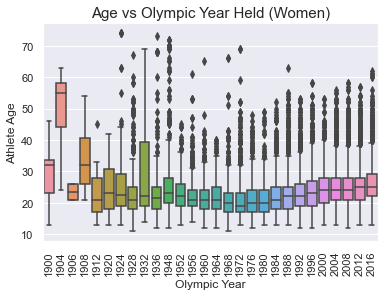

In [81]:
chart = sns.boxplot(x='Year', y='Age', data = age_df_f )
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.xlabel("Olympic Year", fontsize= 12)
plt.ylabel("Athlete Age", fontsize= 12)
plt.title("Age vs Olympic Year Held (Women)", fontsize= 15)

Text(0.5, 1.0, 'Age vs Sport (Women)')

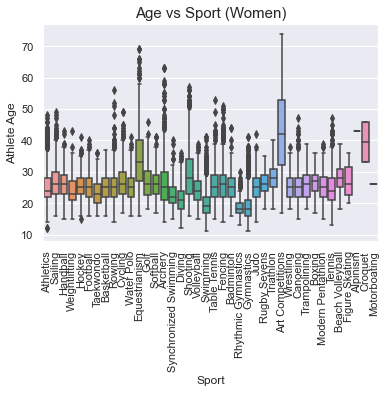

In [82]:
chart = sns.boxplot(x='Sport', y='Age', data = age_df_f )
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.xlabel("Sport", fontsize= 12)
plt.ylabel("Athlete Age", fontsize= 12)
plt.title("Age vs Sport (Women)", fontsize= 15)

In [42]:
# How many sports for female athletes?

sport_list = age_df_f["Sport"].value_counts()
sport_list

Athletics                11666
Swimming                  9850
Gymnastics                9129
Rowing                    2193
Fencing                   2000
Shooting                  1724
Volleyball                1543
Hockey                    1459
Handball                  1401
Cycling                   1394
Canoeing                  1380
Basketball                1256
Equestrianism             1246
Diving                    1210
Tennis                    1178
Judo                      1093
Archery                   1015
Football                  1012
Table Tennis               953
Sailing                    926
Synchronized Swimming      909
Badminton                  740
Rhythmic Gymnastics        658
Water Polo                 488
Softball                   478
Weightlifting              463
Art Competitions           377
Wrestling                  304
Taekwondo                  299
Beach Volleyball           276
Triathlon                  263
Modern Pentathlon          164
Rugby Se

In [45]:
# how many events for female athletes?
event_list_w = age_df_f["Event"].nunique()
event_list_w

214

In [48]:
# women and age only Athletics
age_df_f_ath = age_df[(age_df.Sport == "Athletics")]
age_df_f_ath.head()

,ID,Name,Sex,Age,Sport,Event,Year
26,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,Athletics,Athletics Women's 100 metres,1932
27,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,Athletics,Athletics Women's 4 x 100 metres Relay,1932
57,18,Timo Antero Aaltonen,M,31.0,Athletics,Athletics Men's Shot Put,2000
94,31,Evald rma (rman-),M,24.0,Athletics,Athletics Men's Pole Vault,1936
95,32,Olav Augunson Aarnes,M,23.0,Athletics,Athletics Men's High Jump,1912


In [83]:
# men and age 
age_df_m = age_df[(age_df.Sex == "M")]
age_df_m.shape
age_df_m.head()

,ID,Name,Sex,Age,Sport,Event,Year
0,1,A Dijiang,M,24.0,Basketball,Basketball Men's Basketball,1992
1,2,A Lamusi,M,23.0,Judo,Judo Men's Extra-Lightweight,2012
2,3,Gunnar Nielsen Aaby,M,24.0,Football,Football Men's Football,1920
3,4,Edgar Lindenau Aabye,M,34.0,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,1900
29,10,"Einar Ferdinand ""Einari"" Aalto",M,26.0,Swimming,Swimming Men's 400 metres Freestyle,1952


In [64]:
## BMI

In [73]:
# display just the columns needed to look at BMI over time
bmi_df = summer_df[["ID","Name","Sex","BMI","Sport","Event","Year"]].copy()
bmi_df = bmi_df[bmi_df['BMI'].notna()]
bmi_df.shape
bmi_df.head()
    

,ID,Name,Sex,BMI,Sport,Event,Year
0,1,A Dijiang,M,24.691358,Basketball,Basketball Men's Basketball,1992
1,2,A Lamusi,M,20.761246,Judo,Judo Men's Extra-Lightweight,2012
31,12,Jyri Tapani Aalto,M,23.661439,Badminton,Badminton Men's Singles,2000
32,13,Minna Maarit Aalto,F,21.953246,Sailing,Sailing Women's Windsurfer,1996
33,13,Minna Maarit Aalto,F,21.953246,Sailing,Sailing Women's Windsurfer,2000


In [85]:
# BMI for female athletes
bmi_df_f = bmi_df[(bmi_df.Sex == "F")]
bmi_df_f 


,ID,Name,Sex,BMI,Sport,Event,Year
32,13,Minna Maarit Aalto,F,21.953246,Sailing,Sailing Women's Windsurfer,1996
33,13,Minna Maarit Aalto,F,21.953246,Sailing,Sailing Women's Windsurfer,2000
80,22,Andreea Aanei,F,43.252595,Weightlifting,Weightlifting Women's Super-Heavyweight,2016
105,37,Ann Kristin Aarnes,F,19.321338,Football,Football Women's Football,1996
135,49,Moonika Aava,F,23.030045,Athletics,Athletics Women's Javelin Throw,2004
...,...,...,...,...,...,...,...
271080,135553,Galina Ivanovna Zybina (-Fyodorova),F,28.344671,Athletics,Athletics Women's Shot Put,1964
271099,135560,Stavroula Zygouri,F,21.545091,Wrestling,"Wrestling Women's Middleweight, Freestyle",2004
271102,135563,Olesya Nikolayevna Zykina,F,21.887076,Athletics,Athletics Women's 4 x 400 metres Relay,2000
271103,135563,Olesya Nikolayevna Zykina,F,21.887076,Athletics,Athletics Women's 4 x 400 metres Relay,2004


In [86]:
# BMI for male athletes
bmi_df_m = bmi_df[(bmi_df.Sex == "M")]
bmi_df_m 

,ID,Name,Sex,BMI,Sport,Event,Year
0,1,A Dijiang,M,24.691358,Basketball,Basketball Men's Basketball,1992
1,2,A Lamusi,M,20.761246,Judo,Judo Men's Extra-Lightweight,2012
31,12,Jyri Tapani Aalto,M,23.661439,Badminton,Badminton Men's Singles,2000
41,17,Paavo Johannes Aaltonen,M,20.897959,Gymnastics,Gymnastics Men's Individual All-Around,1948
42,17,Paavo Johannes Aaltonen,M,20.897959,Gymnastics,Gymnastics Men's Team All-Around,1948
...,...,...,...,...,...,...,...
271105,135565,Fernando scar Zylberberg,M,26.927438,Hockey,Hockey Men's Hockey,2000
271106,135565,Fernando scar Zylberberg,M,26.927438,Hockey,Hockey Men's Hockey,2004
271107,135566,"James Francis ""Jim"" Zylker",M,24.489796,Football,Football Men's Football,1972
271108,135567,Aleksandr Viktorovich Zyuzin,M,21.499597,Rowing,Rowing Men's Lightweight Coxless Fours,2000
